## Dataset used from Kaggle : 
[Link](https://www.kaggle.com/datasets/murtozalikhon/brain-tumor-multimodal-image-ct-and-mri)

In [1]:
import numpy as np
import pandas as pd
import os
base_path = "Dataset/Brain Tumor MRI images"
categories = ["Healthy","Tumor"]
image_paths = []
labels = []
for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)

df = pd.DataFrame({
 "image_path": image_paths,
 "label": labels
})
df.head()

,image_path,label
0,Dataset/Brain Tumor MRI images/Healthy/mri_hea...,Healthy
1,Dataset/Brain Tumor MRI images/Healthy/mri_hea...,Healthy
2,Dataset/Brain Tumor MRI images/Healthy/mri_hea...,Healthy
3,Dataset/Brain Tumor MRI images/Healthy/mri_hea...,Healthy
4,Dataset/Brain Tumor MRI images/Healthy/mri_hea...,Healthy


In [2]:
df.tail()

,image_path,label
4995,Dataset/Brain Tumor MRI images/Tumor/tumor (35...,Tumor
4996,Dataset/Brain Tumor MRI images/Tumor/meningiom...,Tumor
4997,Dataset/Brain Tumor MRI images/Tumor/glioma (1...,Tumor
4998,Dataset/Brain Tumor MRI images/Tumor/meningiom...,Tumor
4999,Dataset/Brain Tumor MRI images/Tumor/meningiom...,Tumor


In [3]:
df.shape


(5000, 2)

In [4]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  5000 non-null   object
 1   label       5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


In [8]:
df['label'].unique()
array=np.array
array(['Healthy', 'Tumor'], dtype=object)
df['label'].value_counts()

label
Tumor      3000
Healthy    2000
Name: count, dtype: int64

/tmp/ipykernel_12384/867187101.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="viridis", ax=ax)


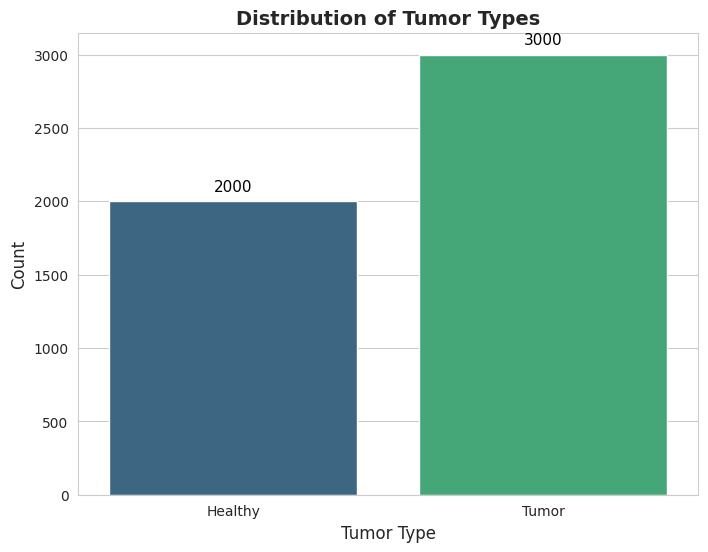

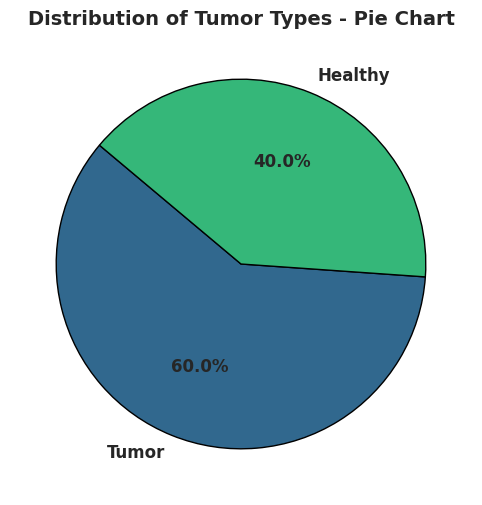

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis", ax=ax)
ax.set_title("Distribution of Tumor Types", fontsize=14, fontweight='bold')
ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.show()
label_counts = df["label"].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("viridis", len(label_counts))
ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
       startangle=140, colors=colors, textprops={'fontsize': 12, 'weight':
                                                 'bold'},
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})
ax.set_title("Distribution of Tumor Types - Pie Chart", fontsize=14,
fontweight='bold')
plt.show()

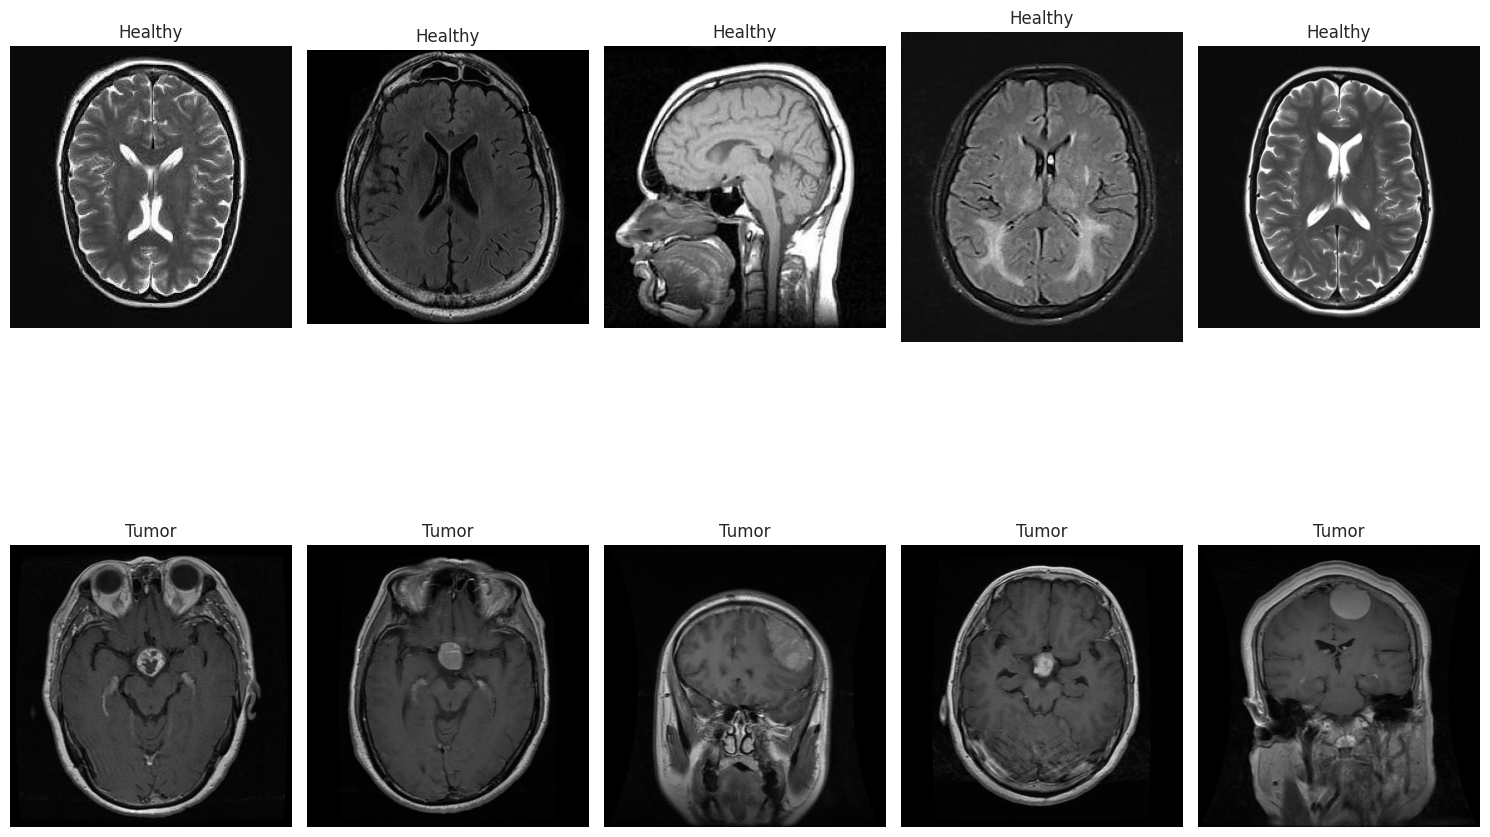

In [10]:
import cv2
num_images = 5
plt.figure(figsize=(15, 12))
for i, category in enumerate(categories):
   category_images = df[df['label'] == category]['image_path'].iloc[:num_images]
   for j, img_path in enumerate(category_images):
     img = cv2.imread(img_path)
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
     plt.subplot(len(categories), num_images, i * num_images + j + 1)
     plt.imshow(img)
     plt.axis('off')
     plt.title(category)

plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['label'])
df = df[['image_path', 'category_encoded']]

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']],
df['category_encoded'])
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    3000
1    3000
Name: count, dtype: int64


In [12]:
df_resampled

,image_path,category_encoded
0,Dataset/Brain Tumor MRI images/Healthy/mri_hea...,0
1,Dataset/Brain Tumor MRI images/Healthy/mri_hea...,0
2,Dataset/Brain Tumor MRI images/Healthy/mri_hea...,0
3,Dataset/Brain Tumor MRI images/Healthy/mri_hea...,0
4,Dataset/Brain Tumor MRI images/Healthy/mri_hea...,0
...,...,...
5995,Dataset/Brain Tumor MRI images/Healthy/mri_hea...,0
5996,Dataset/Brain Tumor MRI images/Healthy/mri_hea...,0
5997,Dataset/Brain Tumor MRI images/Healthy/mri_hea...,0
5998,Dataset/Brain Tumor MRI images/Healthy/mri_hea...,0


In [13]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
import warnings
warnings.filterwarnings("ignore")
print ('check')

2025-04-01 19:58:25.289386: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743524905.312517   12384 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743524905.319523   12384 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743524905.336288   12384 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743524905.336314   12384 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743524905.336317   12384 computation_placer.cc:177] computation placer alr

check


In [14]:
train_df_new, temp_df_new = train_test_split(
 df_resampled,
 train_size=0.8,
 shuffle=True,
 random_state=42,
 stratify=df_resampled['category_encoded']
)
valid_df_new, test_df_new = train_test_split(
 temp_df_new,
 test_size=0.5,
 shuffle=True,
 random_state=42,
  stratify=temp_df_new['category_encoded']
)
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)
train_gen_new = tr_gen.flow_from_dataframe(
 train_df_new,
 x_col='image_path',
 y_col='category_encoded',
 target_size=img_size,
 class_mode='binary',
 color_mode='rgb',
 shuffle=True,
 batch_size=batch_size
)
valid_gen_new = ts_gen.flow_from_dataframe(
 valid_df_new,
 x_col='image_path',
 y_col='category_encoded',
 target_size=img_size,
 class_mode='binary',
 color_mode='rgb',
 shuffle=True,
 batch_size=batch_size
)
test_gen_new = ts_gen.flow_from_dataframe(
 test_df_new,
 x_col='image_path',
 y_col='category_encoded',
 target_size=img_size,
 class_mode='binary',
 color_mode='rgb',
 shuffle=False,
 batch_size=batch_size
)

Found 4800 validated image filenames belonging to 2 classes.
Found 600 validated image filenames belonging to 2 classes.
Found 600 validated image filenames belonging to 2 classes.


## Model

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from typing import Tuple

class AreaAttentionLayer(keras.layers.Layer):
    def __init__(self, reduction_ratio: int = 8, **kwargs):
        super(AreaAttentionLayer, self).__init__(**kwargs)
        self.reduction_ratio = reduction_ratio
        self.conv1 = layers.Conv2D(32, kernel_size=1, activation='relu')
        self.conv2 = layers.Conv2D(1, kernel_size=3, padding='same', activation='sigmoid')
        self.bn = layers.BatchNormalization()

    def build(self, input_shape):
        super().build(input_shape)

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        height, width, channels = inputs.shape[1], inputs.shape[2], inputs.shape[3]

        area_height = max(1, height // 4)
        area_width = max(1, width // 4)
        
        pad_height = (area_height - (height % area_height)) % area_height
        pad_width = (area_width - (width % area_width)) % area_width

        if pad_height > 0 or pad_width > 0:
            inputs_padded = tf.pad(inputs, [[0, 0], [0, pad_height], [0, pad_width], [0, 0]])
            new_height, new_width = height + pad_height, width + pad_width
        else:
            inputs_padded = inputs
            new_height, new_width = height, width

        x = tf.reshape(inputs_padded, [batch_size, new_height // area_height, area_height, new_width // area_width, area_width, channels])
        x = tf.transpose(x, [0, 1, 3, 2, 4, 5])
        x = tf.reshape(x, [batch_size * (new_height // area_height) * (new_width // area_width), area_height, area_width, channels])
        
        attention = self.conv1(x)
        attention = self.bn(attention)
        attention = self.conv2(attention)
        
        attention = tf.reshape(attention, [batch_size, new_height // area_height, new_width // area_width, area_height, area_width, 1])
        attention = tf.transpose(attention, [0, 1, 3, 2, 4, 5])
        attention = tf.reshape(attention, [batch_size, new_height, new_width, 1])

        if pad_height > 0 or pad_width > 0:
            attention = attention[:, :height, :width, :]
            output = inputs * attention
        else:
            output = inputs_padded * attention
        
        return output

    def get_config(self):
        config = super().get_config()
        config.update({'reduction_ratio': self.reduction_ratio})
        return config


class CNNBlock(keras.layers.Layer):
    def __init__(self, filters: int, use_attention: bool = True, **kwargs):
        super(CNNBlock, self).__init__(**kwargs)
        self.filters = filters
        self.use_attention = use_attention
        
        if self.use_attention:
            self.area_attention = AreaAttentionLayer()
        
        self.conv = keras.Sequential([
            layers.Conv2D(filters, kernel_size=3, padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(filters, kernel_size=3, padding='same', use_bias=False),
            layers.BatchNormalization()
        ])

        self.shortcut = keras.Sequential()

    def build(self, input_shape):
        if self.filters != input_shape[-1]:
            self.shortcut = keras.Sequential([
                layers.Conv2D(self.filters, kernel_size=1, padding='same', use_bias=False),
                layers.BatchNormalization()
            ])
        super().build(input_shape)

    def call(self, inputs):
        x = self.area_attention(inputs) if self.use_attention else inputs
        x = self.conv(x)
        shortcut = self.shortcut(inputs) if len(self.shortcut.layers) > 0 else inputs
        x += shortcut
        return tf.nn.relu(x)

    def get_config(self):
        config = super().get_config()
        config.update({'filters': self.filters, 'use_attention': self.use_attention})
        return config


class RESNet(keras.Model):
    def __init__(self, num_classes: int = 2, dropout_rate: float = 0.3, initial_filters: int = 32, **kwargs):
        super(RESNet, self).__init__(**kwargs)
        self.num_classes = num_classes
        self.dropout_rate = dropout_rate
        self.initial_filters = initial_filters

        self.stem = keras.Sequential([
            layers.Conv2D(self.initial_filters, kernel_size=7, strides=2, padding='same', use_bias=False),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.MaxPooling2D(pool_size=3, strides=2, padding='same')
        ])

        self.blocks = [CNNBlock(self.initial_filters * (2**i), use_attention=True) for i in range(3)]

        self.downsamples = [
            keras.Sequential([
                layers.Conv2D(self.initial_filters * (2**(i+1)), kernel_size=3, strides=2, padding='same', use_bias=False),
                layers.BatchNormalization(),
                layers.ReLU()
            ]) for i in range(2)
        ]

        self.final_attention = AreaAttentionLayer()
        self.global_pool = layers.GlobalAveragePooling2D()
        self.dropout = layers.Dropout(self.dropout_rate)
        self.fc = layers.Dense(1 if num_classes == 2 else num_classes, activation='sigmoid' if num_classes == 2 else 'softmax')

    def call(self, inputs, training=None):
        x = self.stem(inputs)
        for i, block in enumerate(self.blocks):
            x = block(x)
            if i < len(self.downsamples):
                x = self.downsamples[i](x)
                if training:
                    x = self.dropout(x)
        x = self.final_attention(x)
        x = self.global_pool(x)
        if training:
            x = self.dropout(x)
        return self.fc(x)

    def get_config(self):
        config = super().get_config()
        config.update({'num_classes': self.num_classes, 'dropout_rate': self.dropout_rate, 'initial_filters': self.initial_filters})
        return config


def build_model(input_shape: Tuple[int, int, int] = (224, 224, 3), num_classes: int = 2, learning_rate: float = 1e-3):
    model = RESNet(num_classes=num_classes)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy' if num_classes == 2 else 'sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    model.build(input_shape=(None, *input_shape))
    return model

In [19]:
if __name__ == "__main__":
    model = build_model(input_shape=(224, 224, 3), num_classes=2)
    model.summary()
    history = model.fit(train_gen_new,validation_data=valid_gen_new,epochs=10,batch_size=16,verbose=1)

I0000 00:00:1743524909.769916   12384 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3490 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "res_net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn_block (CNNBlock)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn_block_1 (CNNBlock)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn_block_2 (CNNBlock)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_8 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ area_attention_layer_3          │ ?                      │   0 (unbuilt) │
│ (AreaAttentionLayer)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


I0000 00:00:1743524919.636308   12450 service.cc:152] XLA service 0x7f6f2c08de80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743524919.636340   12450 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1050, Compute Capability 6.1
2025-04-01 19:58:39.881115: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743524921.241498   12450 cuda_dnn.cc:529] Loaded cuDNN version 90800
2025-04-01 19:58:42.705171: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.25 = (f32[256,1,14,14]{3,2,1,0}, u8[0]{0}) custom-call(f32[256,32,14,14]{3,2,1,0} %bitcast.22607, f32[1,32,3,3]{3,2,1,0} %bitcast.17772, f32[1]{0} %bitcast.22667), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__c

InternalError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/asyncio/base_events.py", line 645, in run_forever

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/asyncio/base_events.py", line 1999, in _run_once

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3047, in run_cell

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3102, in _run_cell

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3306, in run_cell_async

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3489, in run_ast_nodes

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3549, in run_code

  File "/tmp/ipykernel_12384/3386269542.py", line 4, in <module>

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/home/ali/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

libdevice not found at ./libdevice.10.bc
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_13367]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

plot_history(history)

In [ ]:
y_pred = model.predict(test_gen_new)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()
y_true = test_gen_new.classes

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print('Classification Report:\n', classification_report(y_true, y_pred_classes))